In [1]:
import os
import graphviz
import owlready2 as owl
import weakref

In [2]:
onto_path = 'file://' + os.path.abspath('ontologies/gistCore9.5.0')
onto = owl.get_ontology(onto_path).load()
print('Loaded owl file at:', onto_path)
# onto1 = get_ontology("file:///Users/lawrence/ontologies/project_example.owl").load() NEED TO ADD EMPTY ONTOLOGY
# onto.base_iri

Loaded owl file at: file:///Users/lawrence/Documents/GitHub/Data-models-for-projects/Data_model_recorded_as_ontology_Owlready/ontologies/gistCore9.5.0


In [ ]:
# OPTION LOOK ACROSS ALL CLASSES
for x in onto.classes(): 
    print(x)

In [ ]:
# OPTION Or transform the generator into a list with the list() Python function:
classes=list(onto.classes())
# Get a random class in collection
print (classes[-10])
# or look at disjoint classes
list (onto.disjoint_classes())

In [3]:
# FIND THE CLASSES OF INTEREST
Project_class=onto.search(iri='*Project*')
Task_class=onto.search(iri='*Task')
Artifact_class=onto.search(iri='*Artifact')
print(Project_class,Task_class,Artifact_class)

[gist.Project] [gist.Task, gist.hasSubTask, gist.ScheduledTask, gist.hasDirectSubTask] [gist.Artifact]


In [4]:
# SELECT THE CLASSES OF INTEREST FROM SEARCH RESULTS
Project_class_actually=Project_class[0]=Project_class[0]
Task_class_actually=Task_class[0]
Artifact_class_actually=Artifact_class[0]

In [ ]:
# OPTION HAVE A LOOK AT CLASS PROPERTIES
print ('is a', Artifact_class_actually.is_a)
print('equivalent_to:', Artifact_class_actually.equivalent_to)
print('has subclasses: ', onto.search(subclass_of=Artifact_class_actually))
for sc in Artifact_class_actually.ancestors():
    print (sc)
for sc in Artifact_class_actually.descendants():
    print (sc)
print(Artifact_class_actually.__dict__)

In [6]:
# CREATE INSTANCES OF THIS CLASS

In [5]:
#Refer to each project as ProjectX[0] etc
Project=[]
ProjectX=[]
for p in range (0,3):
    name='Project'+str(p)
    Project.append(name)
    ProjectX.append(Project_class_actually(Project[p]))
    print (Project[p], '   ',ProjectX[p])

Project0     gist.Project0
Project1     gist.Project1
Project2     gist.Project2


In [6]:
# TaskX[0] etc
Task=[]
TaskX=[]
for t in range (0,9):
    name='Task'+str(t)
    Task.append(name)
    TaskX.append(Task_class_actually(Task[t]))
    print (Task[t], '   ',TaskX[t])

Task0     gist.Task0
Task1     gist.Task1
Task2     gist.Task2
Task3     gist.Task3
Task4     gist.Task4
Task5     gist.Task5
Task6     gist.Task6
Task7     gist.Task7
Task8     gist.Task8


In [7]:
# ArtifactX[0] etc
Artifact=[]
ArtifactX=[]
for t in range (0,3):
    name='Artifact'+str(t)
    Artifact.append(name)
    ArtifactX.append(Artifact_class_actually(Artifact[t]))
    print (Artifact[t], '   ',ArtifactX[t])

Artifact0     gist.Artifact0
Artifact1     gist.Artifact1
Artifact2     gist.Artifact2


In [ ]:
# OPTIONAL  
# ACCESS INSTANCES BY GENERAL VARIABLE OR BY ITERATING THROUGH CLASS
print (ProjectX[0].name)
print (ProjectX[0].iri)
list (onto.individuals())
# note that this particular ontology has ensured some individuals are disjoint
# Some tasks will not be disjoint, but Project people will be, so good to have a go at creating this
print ('\n different indiviudals')
list (onto.different_individuals())
list (onto.individuals())

In [ ]:
# OPTIONAL  
for p in Project_class_actually.instances():
    print (p.name)
for t in Task_class_actually.instances():
    print (t.name)
for t in Artifact_class_actually.instances():
    print (t.name)

In [68]:
# CREATE RELATIONSHIPS

In [50]:
# Most simple
# ProjectX[0].hasSubTask = [TaskX[0],TaskX[1],TaskX[2]]

In [59]:
# Second most simple
# ProjectX[0] is type Gist.Project and is not subscriptable. But below is a generator so can use:
#for p in Project_class_actually.instances():
#    p.hasSubTask = [TaskX[0]]

In [8]:
# Third most simple
# ProjectX[0] is type Gist.Project and is not subscriptable. But below is a generator so can use:
counter=0
for p in Project_class_actually.instances():
    p.hasSubTask = [TaskX[counter],TaskX[counter+1],TaskX[counter+2]]
    counter+=3

In [9]:
print (ProjectX[0].get_properties())

{gist.hasSubTask}


In [13]:
ProjectX[2].INDIRECT_hasSubTask

[gist.Task6,
 gist.Event & gist.hasGoal.some(gist.Intention),
 gist.Task,
 gist.Task7,
 gist.Task & gist.hasSubTask.some(gist.Task),
 gist.Task8]

In [23]:
# Retrieve all object properties
# Or list all properties with 
list(onto.properties())
properties = list(onto.object_properties())

In [ ]:
properties

In [49]:
h=onto.search(iri='*hasSubTask*')

In [53]:
print(h[0].__dict__)

{'namespace': get_ontology("https://ontologies.semanticarts.com/o/gistCore#").get_namespace("https://ontologies.semanticarts.com/gist/"), 'is_a': [owl.ObjectProperty, owl.TransitiveProperty], 'storid': 509, '_name': 'hasSubTask', '_equivalent_to': [], '__module__': 'owlready2.entity', '__doc__': None, '_domain': None, '_range': None, '_property_chain': None, '_inverse_property': gist.subTaskOf, '_python_name': 'hasSubTask', '_class_property_type': [], '_class_property_some': True, '_class_property_only': False, '_class_property_relation': False, '_inverse_storid': 580}


In [54]:
print('class_property_some:', h[0]._class_property_some)
print('class_property_only:', h[0]._class_property_only)
print('class_property_relation:', h[0]._class_property_relation)

class_property_some: True
class_property_only: False
class_property_relation: False


In [55]:
print('name(string):', h[0].name)
print('module_type:', h[0].__module__)
print('is_a:', h[0].is_a)
print()

name(string): hasSubTask
module_type: owlready2.entity
is_a: [owl.ObjectProperty, owl.TransitiveProperty]



In [13]:
#Try the same but calling the functions from *.py file
import graph_onto as GO

In [16]:
print('-'*20)
entity = GO.keyword_search_onto('Project', onto)

--------------------


False gist.Project
[('Project', 'hasSubTask, some', 'Task')]


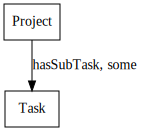

In [17]:
print(entity == onto.Thing, entity)
kg = ontograf_simple(entity, onto)
print(kg)
convert_to_graphviz(kg)